In [16]:
# Todd Smith - Antibody-Engineering Hackathon 2023
# notebook focuses on reading an igblast tsv file (outfmt 19) into a 
# pandas dataframe, using various columns (productive, complete_vdj, vj_in_frame, v_frameshift) to 
# filter data and observe the effect of filtering on the distribution of seqence lengths
# additionally, data related to FWR and CDR aa's are used to computure D50 scores to show the diversity 
# of specific regions with in the FAb portion of antibody chains. 
import pandas as pd
path = 'data/todd/'

In [2]:
# load the data
df = pd.read_csv(path + 'SRR4431764merged.igblast',sep='\t')

seq_len
463    32915
462    31378
464    26663
461    26042
460    26033
       ...  
81         1
66         1
41         1
39         1
58         1
Name: count, Length: 545, dtype: int64


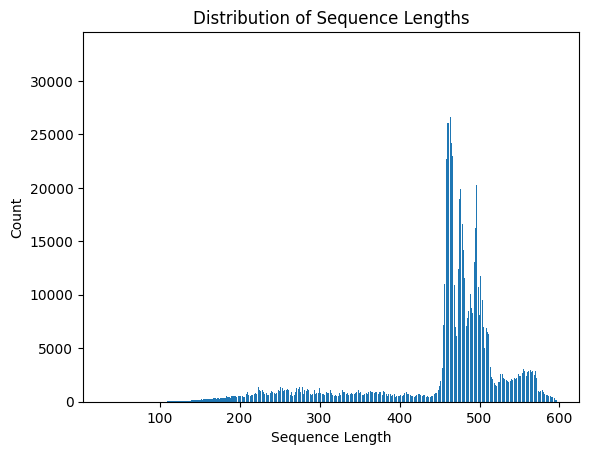

In [3]:
# add a new column with the length of the sequences 
df["seq_len"] = df["sequence"].apply(len)
seq_len_counts = df["seq_len"].value_counts()

#print(df[['sequence', 'seq_len']])
print(seq_len_counts)

seq_len_counts = seq_len_counts.sort_index()

# Plot the distribution of sequence lengths
import matplotlib.pyplot as plt
plt.bar(seq_len_counts.index, seq_len_counts.values)
plt.xlabel("Sequence Length")
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.show()
plt.close()

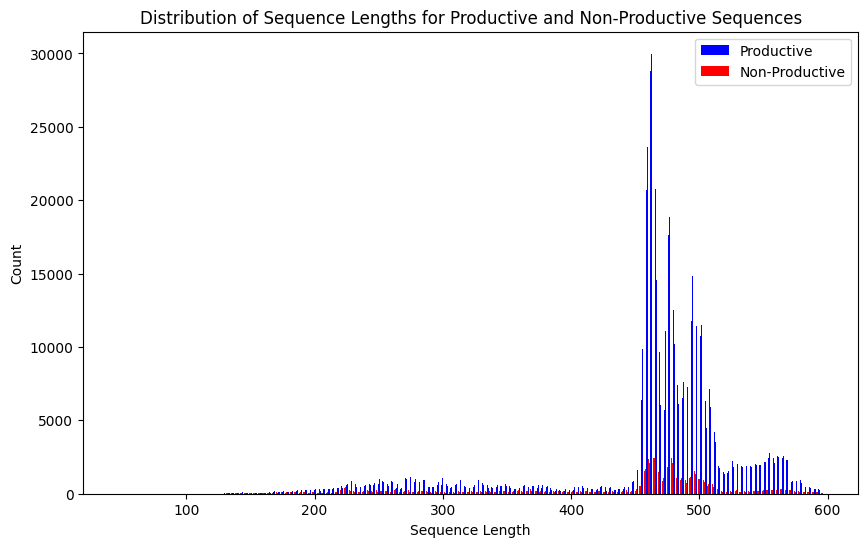

In [4]:
df['seq_len'] = df['sequence'].apply(len)

# Filter the data where 'productive' is 'T'
productive_df = df[df['productive'] == 'T']

# Filter the data where 'productive' is 'F'
non_productive_df = df[df['productive'] == 'F']

# Count the occurrences of each sequence length for productive and non-productive sequences
productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

# Create a single plot with two bars side by side
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of sequence lengths for productive sequences (in blue)
ax.bar(productive_seq_len_counts.index - 0.2, productive_seq_len_counts.values, width=0.4, color='blue', label='Productive')

# Plot the distribution of sequence lengths for non-productive sequences (in red)
ax.bar(non_productive_seq_len_counts.index + 0.2, non_productive_seq_len_counts.values, width=0.4, color='red', label='Non-Productive')

ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sequence Lengths for Productive and Non-Productive Sequences')
ax.legend()

plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

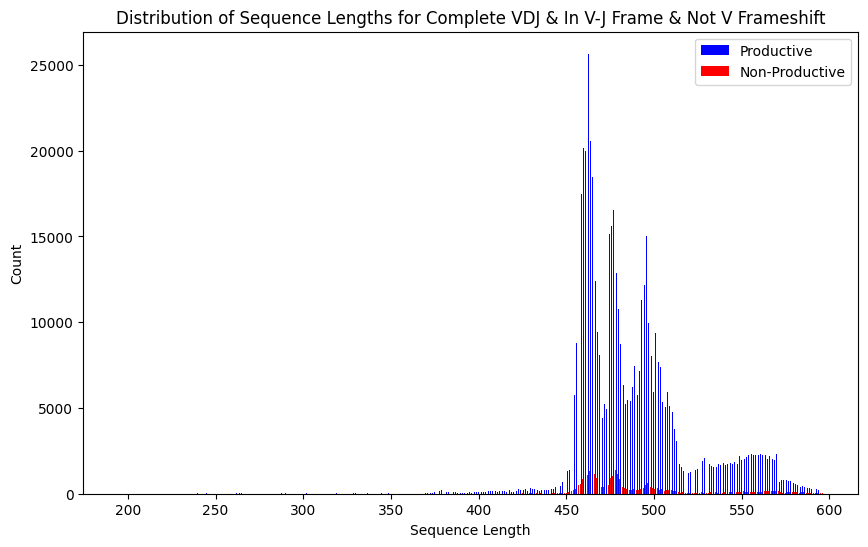

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with columns 'sequence', 'productive', and 'seq_len'

# Create a new column 'seq_len' that contains the length of each sequence
df['seq_len'] = df['sequence'].apply(len)

# Filter conditions
filter_conditions = [
    {'label': 'Complete VDJ & In V-J Frame & Not V Frameshift', 
     'conditions': (df['complete_vdj'] == 'T') 
     & (df['vj_in_frame']=='T') 
     & (df['v_frameshift'] == 'F')},
    # Add more filter conditions here if needed
]

# Loop through each filter condition and create a separate plot
for filter_data in filter_conditions:
    label = filter_data['label']
    conditions = filter_data['conditions']

    # Filter the data
    filtered_df = df[conditions]

    # Get the productive and non-productive subsets
    productive_df = filtered_df[filtered_df['productive'] == 'T']
    non_productive_df = filtered_df[filtered_df['productive'] == 'F']

    # Count the occurrences of each sequence length for productive and non-productive sequences
    productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
    non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

    # Create a new figure for each filter condition
    plt.figure()
    
    # Create a single plot for the filter condition
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the distribution of sequence lengths for productive sequences (in blue)
    ax.bar(productive_seq_len_counts.index - 0.2, productive_seq_len_counts.values, width=0.4, color='blue', label='Productive')

    # Plot the distribution of sequence lengths for non-productive sequences (in red)
    ax.bar(non_productive_seq_len_counts.index + 0.2, non_productive_seq_len_counts.values, width=0.4, color='red', label='Non-Productive')

    ax.set_xlabel('Sequence Length')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Sequence Lengths for {label}')
    ax.legend()

plt.show()


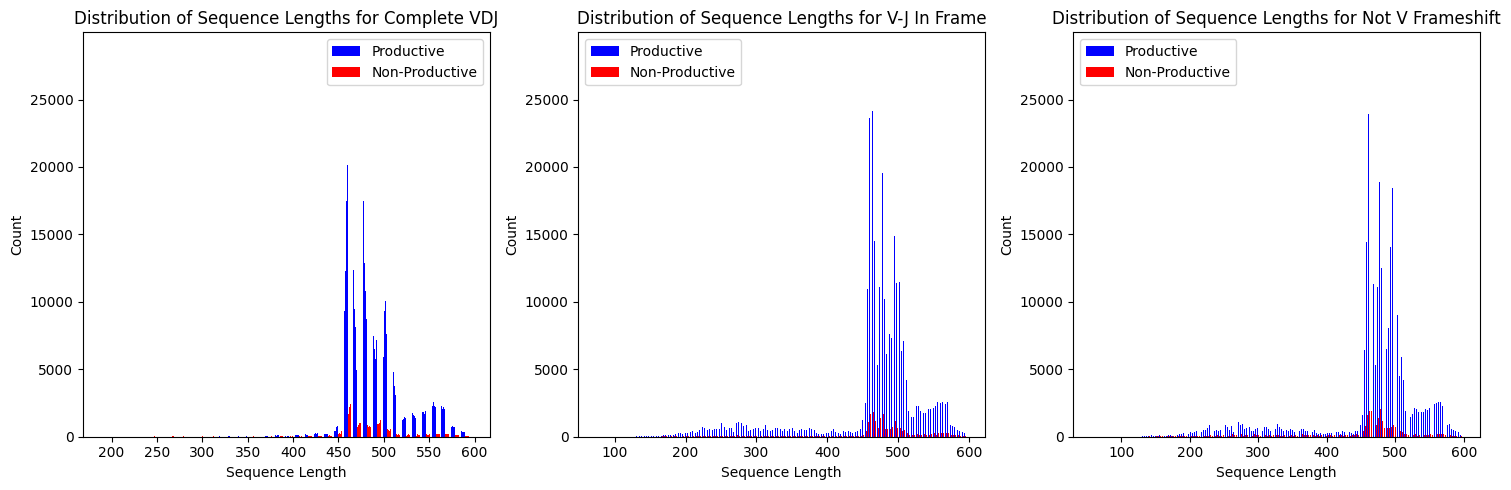

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with columns 'sequence', 'productive', 'complete_vdj', 'vj_in_frame', and 'v_frameshift'

# Create a new column 'seq_len' that contains the length of each sequence
df['seq_len'] = df['sequence'].apply(len)

# Filter conditions
filter_conditions = [
    {'column': 'complete_vdj', 'label': 'Complete VDJ', 'condition': 'T'},
    {'column': 'vj_in_frame', 'label': 'V-J In Frame', 'condition': 'T'},
    {'column': 'v_frameshift', 'label': 'Not V Frameshift', 'condition': 'F'}
    # Add more filter conditions here if needed
]

max_count = 0
for filter_data in filter_conditions:
    column = filter_data['column']
    condition = filter_data['condition']
    
    productive_df = df[(df[column] == condition) & (df['productive'] == 'T')]
    non_productive_df = df[(df[column] == condition) & (df['productive'] == 'F')]
    
    productive_counts = productive_df['seq_len'].value_counts()
    non_productive_counts = non_productive_df['seq_len'].value_counts()
    
    max_count = max(max_count, productive_counts.max(), non_productive_counts.max())
#print(max_count)

# Create subplots for each filter condition
num_filter_conditions = len(filter_conditions)
fig, axes = plt.subplots(1, num_filter_conditions, figsize=(15, 5))

# Loop through each filter condition and create a separate plot
for idx, filter_data in enumerate(filter_conditions):
    column = filter_data['column']
    label = filter_data['label']
    condition = filter_data['condition']

    # Get the productive and non-productive subsets
    productive_df = df[(df[column] == condition) & (df['productive'] == 'T')]
    non_productive_df = df[(df[column] == condition) & (df['productive'] == 'F')]

    # Count the occurrences of each sequence length for productive and non-productive sequences
    productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
    non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

    # Plot the distribution of sequence lengths for productive sequences (in blue)
    axes[idx].bar(productive_seq_len_counts.index - 0.2, productive_seq_len_counts.values, width=0.4, color='blue', label='Productive')

    # Plot the distribution of sequence lengths for non-productive sequences (in red)
    axes[idx].bar(non_productive_seq_len_counts.index + 0.2, non_productive_seq_len_counts.values, width=0.4, color='red', label='Non-Productive')

    axes[idx].set_xlabel('Sequence Length')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of Sequence Lengths for {label}')
    axes[idx].set_ylim(0, max_count)  # Set y-axis limit
    axes[idx].legend()

plt.tight_layout()
plt.show()
plt.close()


In [7]:
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

filtered_df =  df[(df['complete_vdj'] == 'T') & (df['vj_in_frame']=='T') & (df['v_frameshift'] == 'F')]

for column in columns_to_count:
    counts = filtered_df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(counts)
    print(f"Total: '{filtered_df.shape[0]}'")
    print("-----------------------")

Value counts for column 'fwr1_aa':
fwr1_aa
DIQMTQSPSSLSASVGDRVTITCRAS    49746
QSALTQPASVSGSPGQSITISCTGT     39306
DIVMTQSPDSLAVSLGERATINCKSS    30875
EIVLTQSPGTLSLSPGERATLSCRAS    28737
EIVLTQSPATLSLSPGERATLSCRAS    25097
                              ...  
EIVLTQSTDFQSVTPKEKVTITCRAS        1
ENVLTPSPGTLSLSPGERATLSCRAS        1
QPVLTQPPSSSASPGESARLTCTVT         1
QPVLTPPTSHSASPGASARFTCTLR         1
SYDLTQPPSVSVSPGQTAIVTGSGT         1
Name: count, Length: 56951, dtype: int64
Total: '764084'
-----------------------
Value counts for column 'cdr1_aa':
cdr1_aa
SSDVGGYNY       32307
QSISSY          29497
QSVSSSY         24999
QSVSSN          24661
QSVSSY          23228
                ...  
SSDIGSDSY           1
QAIS*H              1
QSRLSNSNNKNY        1
DSDVGRYKY           1
GFXFSTXW            1
Name: count, Length: 34594, dtype: int64
Total: '764084'
-----------------------
Value counts for column 'fwr2_aa':
fwr2_aa
LAWYQQKPGQAPRLLIY    80240
LNWYQQKPGKAPKLLIY    40571
VSWYQQHPGKAPKLMIY

In [8]:
import seaborn as sns
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

filtered_df =  df[(df['complete_vdj'] == 'T') & (df['vj_in_frame']=='T') & (df['v_frameshift'] == 'F')]

for column in columns_to_count:
    # Calculate the value counts for the column
    counts = filtered_df[column].value_counts()
    # Filter the value counts for values greater than 1
    filtered_counts = counts[counts > 10]
    diversity = filtered_counts.shape[0]
    
    print(f"Filtered value counts for column '{column}':")
    print(diversity)
    print("-----------------------")

Filtered value counts for column 'fwr1_aa':
4801
-----------------------
Filtered value counts for column 'cdr1_aa':
5683
-----------------------
Filtered value counts for column 'fwr2_aa':
4923
-----------------------
Filtered value counts for column 'cdr2_aa':
2648
-----------------------
Filtered value counts for column 'fwr3_aa':
7478
-----------------------
Filtered value counts for column 'fwr4_aa':
1182
-----------------------
Filtered value counts for column 'cdr3_aa':
10786
-----------------------


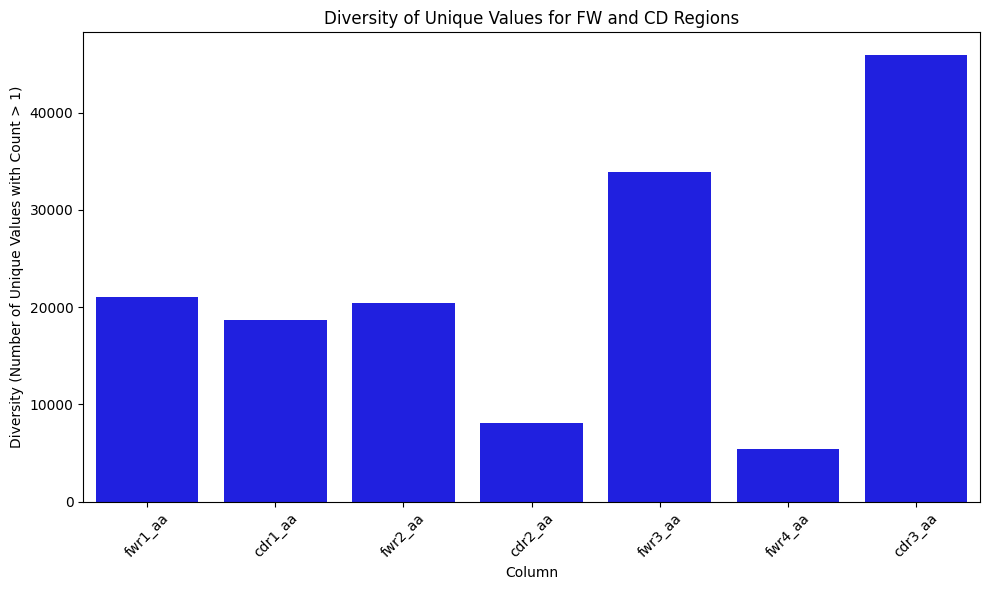

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'

columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Initialize lists to store the column names and their respective diversities
column_names = []
diversities = []

for column in columns_to_count:
    # Calculate the value counts for the column
    counts = df[column].value_counts()
    # Filter the value counts for values greater than 1
    filtered_counts = counts[counts > 1]
    # Calculate the diversity (number of unique values with count > 1)
    diversity = filtered_counts.shape[0]
    
    # Append column name and diversity to the lists
    column_names.append(column)
    diversities.append(diversity)

# Create the bar plot for column names and their diversities using a single color
plt.figure(figsize=(10, 6))
sns.barplot(x=column_names, y=diversities, color='blue')  # Set color to blue
plt.xlabel('Column')
plt.ylabel('Diversity (Number of Unique Values with Count > 1)')
plt.title('Diversity of Unique Values for FW and CD Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


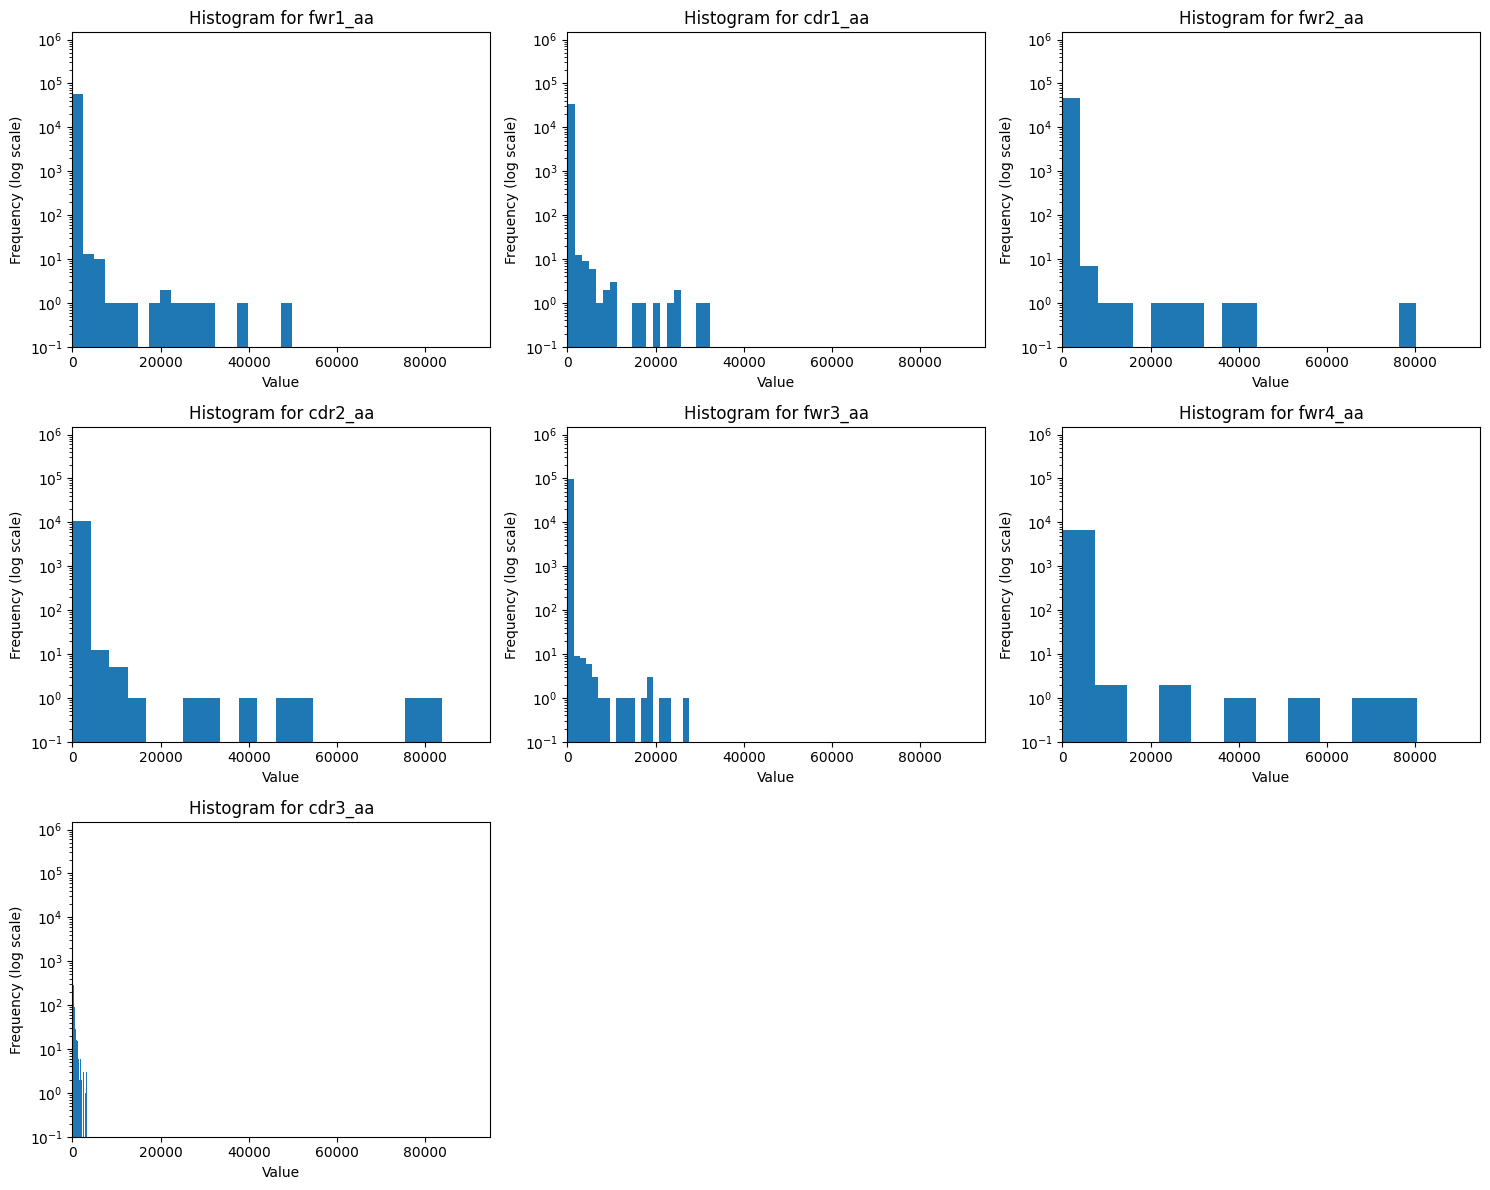

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your pandas DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'

columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

filtered_df =  df[(df['complete_vdj'] == 'T') & (df['vj_in_frame']=='T') & (df['v_frameshift'] == 'F')]

# Initialize lists to store the column names and their respective diversities
column_names = []
diversities = []

# Precompute the histogram data for each column
hist_data = {}
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = filtered_df[column].value_counts()
    # Filter the value counts for values greater than 1
    filtered_counts = counts[counts > 0]
    # Calculate the diversity (number of unique values with count > 1)
    diversity = filtered_counts.shape[0]
    
    # Append column name and diversity to the lists
    column_names.append(column)
    diversities.append(diversity)

    # Precompute the histogram data using value_counts() and store it in hist_data dictionary
    hist_data[column] = filtered_counts.values
    #print(hist_data)

# Get the common ymax value (maximum value across all histograms)
all_values = [value for column_values in hist_data.values() for value in column_values]
ymax = max(all_values)

# Get the common xmax value (maximum value across all histograms)
all_bin_counts = [len(column_values) for column_values in hist_data.values()]
xmax = max(all_bin_counts)

# Plot histograms for each column with 10 bins on log scale with the common ymax
num_rows = len(columns_to_count) // 3 + 1
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_count):
    plt.subplot(num_rows, 3, i + 1)
    values = hist_data[column]
    plt.hist(values, bins=20)
    plt.yscale('log')  # Set y-axis to log scale
    #plt.xcale('log')
    plt.xlabel('Value')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram for {column}')
    plt.ylim(0.1, ymax * 10)  # Set the common ymax value for all subplots
    plt.xlim(0, xmax)  # Set the common xmax value for all subplots
    
plt.tight_layout()
plt.show()

In [11]:
# Assuming 'prod_df' is your filtered DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Calculate the total number of rows in the DataFrame

filtered_df =  df[(df['complete_vdj'] == 'T') & (df['vj_in_frame']=='T') & (df['v_frameshift'] == 'F')]
total_rows = filtered_df.shape[0]

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = filtered_df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    # Print the table for the current column
    print(f"Table for column '{column}':")
    print(result_df)
    print("-----------------------")

Table for column 'fwr1_aa':
                         sequence  number      frac
0      DIQMTQSPSSLSASVGDRVTITCRAS   49746  0.065105
1       QSALTQPASVSGSPGQSITISCTGT   39306  0.051442
2      DIVMTQSPDSLAVSLGERATINCKSS   30875  0.040408
3      EIVLTQSPGTLSLSPGERATLSCRAS   28737  0.037610
4      EIVLTQSPATLSLSPGERATLSCRAS   25097  0.032846
...                           ...     ...       ...
56946  EIVLTQSTDFQSVTPKEKVTITCRAS       1  0.000001
56947  ENVLTPSPGTLSLSPGERATLSCRAS       1  0.000001
56948   QPVLTQPPSSSASPGESARLTCTVT       1  0.000001
56949   QPVLTPPTSHSASPGASARFTCTLR       1  0.000001
56950   SYDLTQPPSVSVSPGQTAIVTGSGT       1  0.000001

[56951 rows x 3 columns]
-----------------------
Table for column 'cdr1_aa':
           sequence  number      frac
0         SSDVGGYNY   32307  0.042282
1            QSISSY   29497  0.038604
2           QSVSSSY   24999  0.032718
3            QSVSSN   24661  0.032275
4            QSVSSY   23228  0.030400
...             ...     ...       ...
3458

total rows: 724561


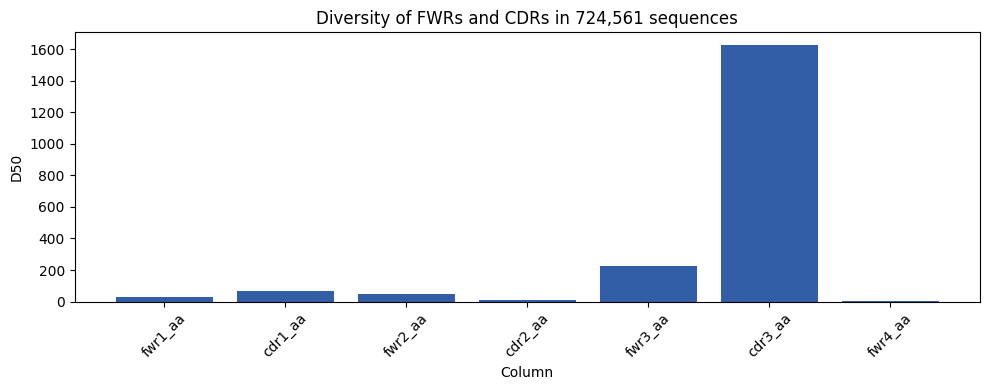

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'prod_df' is your filtered DataFrame containing the columns 
# 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'cdr3_aa', 'fwr4_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'cdr3_aa', 'fwr4_aa']

# Calculate the total number of rows in the DataFrame
filtered_df = df[(df['productive'] == 'T') & (df['complete_vdj'] == 'T') & (df['v_frameshift'] == 'F')]
total_rows = filtered_df.shape[0]
print(f"total rows: {total_rows}")

# Set the filter threshold for cumulative sum of 'frac'
filter_threshold = 0.5

# Initialize a list to store the counts of rows where sum of 'frac' >= 0.9
rows_percent = []

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = filtered_df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    
    # Calculate the cumulative sum of 'frac'
    cumsum = result_df['frac'].cumsum()
    
    # Filter the rows where the cumulative sum is less than or equal to the filter threshold
    filtered_rows = result_df[cumsum <= filter_threshold]
    
    # Count the number of rows that satisfy the condition
    rows_frac = filtered_rows.shape[0]
    rows_percent.append(rows_frac)

# Create a bar plot for the count of rows that account for 90% of data in each column
plt.figure(figsize=(10, 4))
plt.bar(columns_to_count, rows_percent, color='#325ea8')
plt.xlabel('Column')
plt.ylabel(f'D{int(filter_threshold*100)}')
plt.title(f'Diversity of FWRs and CDRs in {total_rows:,} sequences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fwr1_aa
total_rows 87474
filtered_rows 965

cdr1_aa
total_rows 49394
filtered_rows 1015

fwr2_aa
total_rows 71168
filtered_rows 698

cdr2_aa
total_rows 16423
filtered_rows 38

fwr3_aa
total_rows 153888
filtered_rows 2920

fwr4_aa
total_rows 12714
filtered_rows 9

cdr3_aa
total_rows 125603
filtered_rows 6170



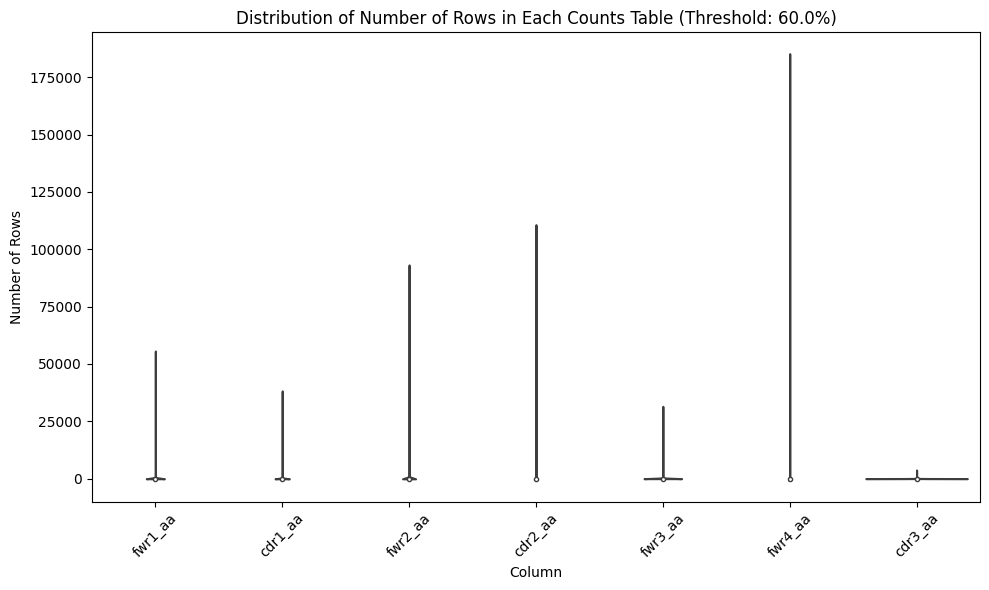

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'prod_df' is your filtered DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Set the filter threshold (fraction sum)
filter_threshold = 0.6

# Initialize a list to store the counts of rows where sum of 'frac' >= filter_threshold
rows_filter_percent = []

# Initialize a list to store the violin plot data
violin_data_list = []

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    
    # Calculate the cumulative sum of 'frac'
    cumsum = result_df['frac'].cumsum()
    
    # Filter the rows where the cumulative sum is less than or equal to the filter_threshold
    filtered_rows = result_df[cumsum <= filter_threshold]
    
    # Count the number of rows that satisfy the condition
    rows_filtered = len(filtered_rows)
    rows_filter_percent.append(rows_filtered)

    # Append the 'number' values to the violin data list
    violin_data_list.append(counts)
    print(column)
    print(f"total_rows {counts.shape[0]}")
    print(f"filtered_rows {rows_filtered}\n")
    

# Create the violin plot for 'number' values
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_data_list)
plt.xlabel('Column')
plt.ylabel('Number of Rows')
plt.title(f'Distribution of Number of Rows in Each Counts Table (Threshold: {filter_threshold * 100}%)')
plt.xticks(ticks=range(len(columns_to_count)), labels=columns_to_count, rotation=45)
plt.tight_layout()
plt.show()


productive
T    963708
F    136067
Name: count, dtype: int64
------------------
complete_vdj
T    804993
F    326980
Name: count, dtype: int64
------------------
v_frameshift
F    1062259
T      26926
Name: count, dtype: int64
------------------
vj_in_frame
T    1043036
F      46149
Name: count, dtype: int64
------------------


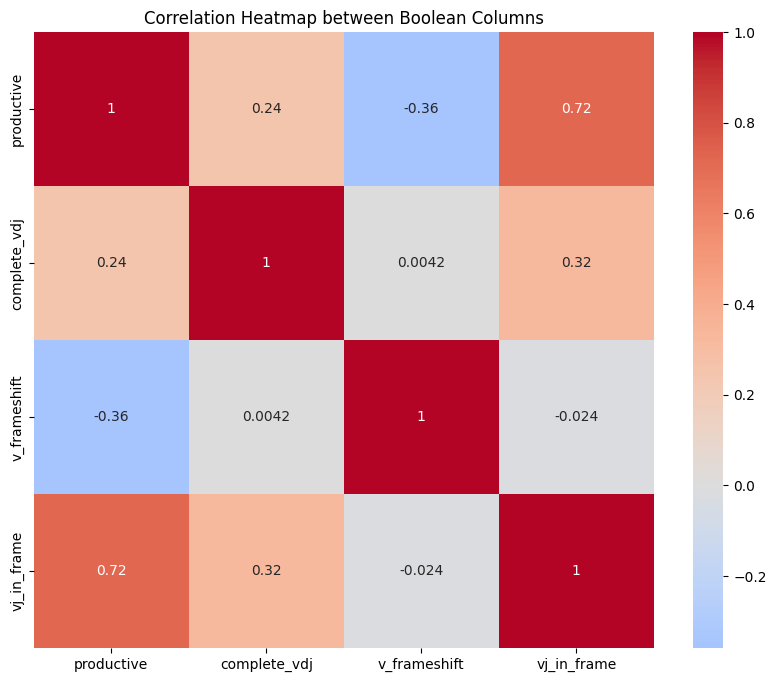

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your existing DataFrame

# Define the columns of interest
columns = ['productive', 'complete_vdj', 'v_frameshift', 'vj_in_frame']

# Create a new DataFrame containing the selected columns
booleans_df = df[columns].copy()

# Convert 'T' and 'F' to boolean values
booleans_df[columns] = booleans_df[columns] == 'T'

# Print value counts for each column in the original DataFrame
for column in columns:
    counts = df[column].value_counts()
    print(counts)
    print("------------------")

# Calculate the correlation matrix
corr_matrix = booleans_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Boolean Columns')
plt.show()


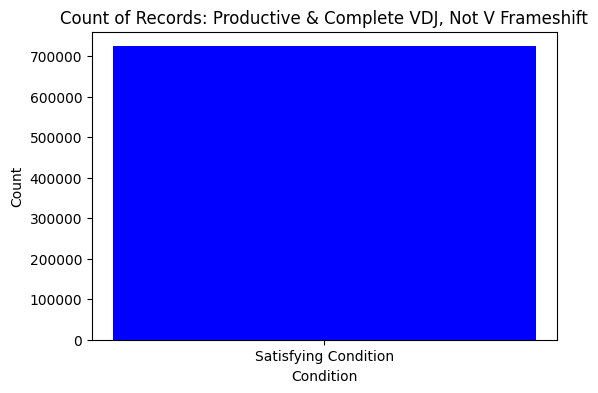

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your existing DataFrame

# Define the columns of interest
columns = ['productive', 'complete_vdj', 'v_frameshift', 'vj_in_frame']

# Filter the DataFrame to find the desired condition
filtered_df = df[(df['productive'] == 'T') & (df['complete_vdj'] == 'T') & (df['v_frameshift'] == 'F')]

# Count the number of records that satisfy the condition
count = len(filtered_df)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Satisfying Condition'], [count], color='blue')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Count of Records: Productive & Complete VDJ, Not V Frameshift')
plt.show()